In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train=pd.read_csv("train-val.csv")
print(train.shape)
train_labels=pd.read_csv("train-labels.csv")
train_labels.head()
train=train.merge(train_labels,on='id')
train.shape

(59400, 40)


(59400, 41)

In [8]:
test=pd.read_csv("test.csv")
test.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

           ...          payment_type water_quality quality_group  \
0          ...             never pay          soft          good   
1          ...             never pay          soft          good   
2          ...             never pay          soft          good   
3          ...               unknown          soft          good   
4          ...               monthly          soft          good   

       quantity  quantity_group                source           source_type  \
0      seasonal        seasonal  rainwater harvesting  rainwater harvesting   
1  insufficient    insufficient                spring                spring   
2  insufficient    insufficient  rainwater harvesting  rainwater harvesting   
3           dry             dry          shallow well          shallow well   
4        enough          enough                spring                spring   

   source_class     waterpoint_type waterpoint_type_group  
0       surface               other                 other  
1   groundwater  communal standpipe    communal standpipe  
2       surface               other                 other  
3   groundwater               other                 other  
4   groundwater  communal standpipe    communal standpipe  

[5 rows x 40 columns]

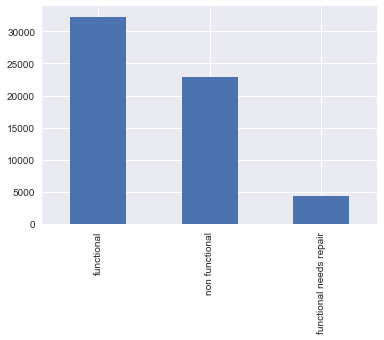

In [9]:
train.status_group.value_counts().plot(kind='bar')

In [10]:
train['year']=pd.DatetimeIndex(train.date_recorded).year
train['month']=pd.DatetimeIndex(train.date_recorded).month
train['day']=pd.DatetimeIndex(train.date_recorded).day


test['year']=pd.DatetimeIndex(test.date_recorded).year
test['month']=pd.DatetimeIndex(test.date_recorded).month
test['day']=pd.DatetimeIndex(test.date_recorded).day

In [11]:
train.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private ... quantity_group  \
0  34.938093  -9.856322                  none            0 ...         enough   
1  34.698766  -2.147466              Zahanati            0 ...   insufficient   
2  37.460664  -3.821329           Kwa Mahundi            0 ...         enough   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0 ...            dry   
4  31.130847  -1.825359               Shuleni            0 ...       seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group    status_group  year  \
0           communal standpipe    communal standpipe      functional  2011   
1           communal standpipe    communal standpipe      functional  2013   
2  communal standpipe multiple    communal standpipe      functional  2013   
3  communal standpipe multiple    communal standpipe  non functional  2013   
4           communal standpipe    communal standpipe      functional  2011   

  month day  
0     3  14  
1     3   6  
2     2  25  
3     1  28  
4     7  13  

[5 rows x 44 columns]

In [12]:
train.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year          year         month           day  
count       59400.000000  59400.000000  59400.000000  59400.000000  
mean         1300.652475   2011.921667      4.375640     15.621498  
std           951.620547      0.958758      3.029247      8.687553  
min             0.000000   2002.000000      1.000000      1.000000  
25%             0.000000   2011.000000      2.000000      8.000000  
50%          1986.000000   2012.000000      3.000000     16.000000  
75%          2004.000000   2013.000000      7.000000     23.000000  
max          2013.000000   2013.000000     12.000000     31.000000

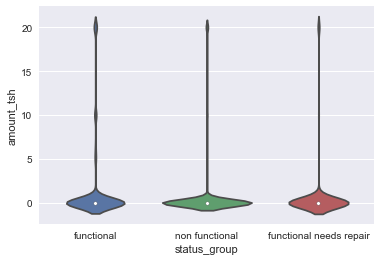

In [13]:
 sns.violinplot(x='status_group',y='amount_tsh',data=train[train.amount_tsh<=20])

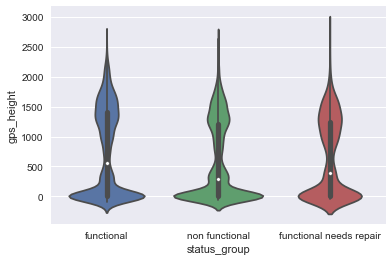

In [14]:
 sns.violinplot(x='status_group',y='gps_height',data=train)

Hmmm for non functional altitude of well is low

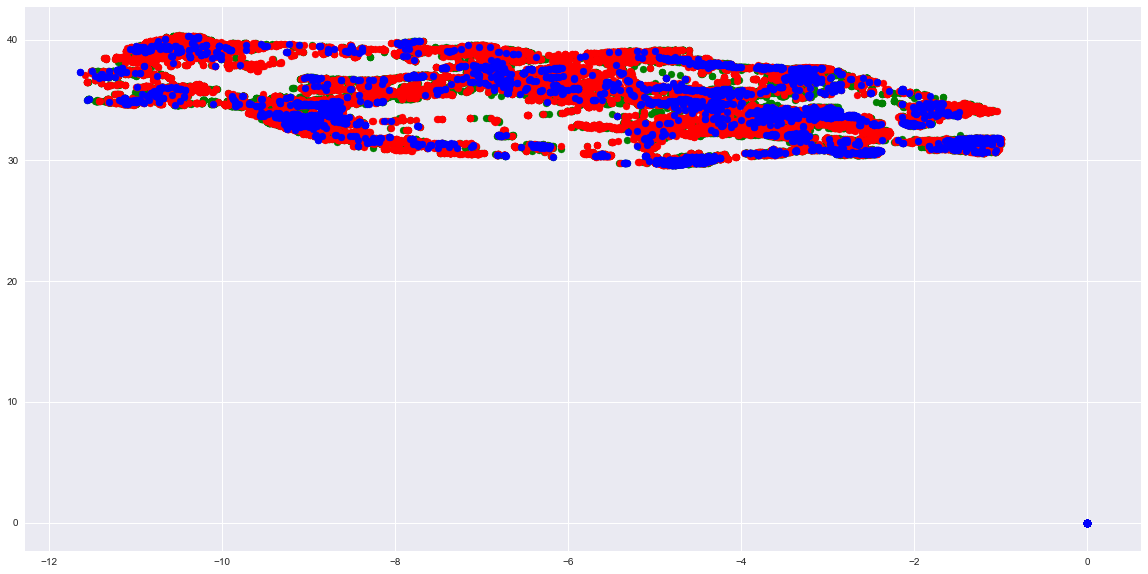

In [15]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import numpy as np
fig, ax = plt.subplots()
train_func=train[train.status_group=='functional']
train_nonfunc=train[train.status_group=='non functional']
train_func_rep=train[train.status_group=='functional needs repair']

ax.scatter(train_func.latitude,train_func.longitude,color='g')
ax.scatter(train_nonfunc.latitude,train_nonfunc.longitude,color='r')
ax.scatter(train_func_rep.latitude,train_func_rep.longitude,color='b')

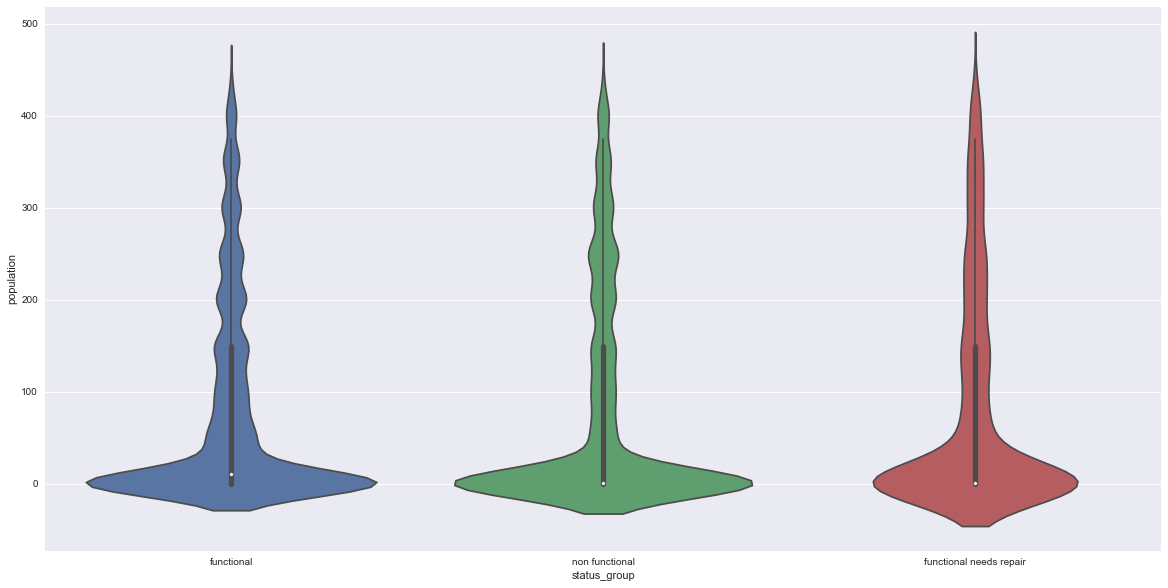

In [16]:
 sns.violinplot(x='status_group',y='population',data=train[train.population<450])

In [17]:
from sklearn import preprocessing 
cols=[i for i in train.columns if i!='status_group' and i!='date_recorded' and i!='id']
train = train.fillna(" ")
test = test.fillna(" ")

features_to_use=[]
for f in cols:
        if train[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train[f].values) + list(test[f].values))
            train[f] = lbl.transform(list(train[f].values))
            test[f] = lbl.transform(list(test[f].values))


In [72]:
import sys
sys.path.append("/Users/priya/xgboost/python-package")
import xgboost as xgb
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1000):
    param = {}
    param['objective'] = 'multi:softmax'
    param['eta'] = 0.1
    param['max_depth'] = 7
    param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [73]:
train_X=train[cols]


target_num_map = {'functional':0, 'functional needs repair':1, 'non functional':2}
train_y=train.status_group.apply(lambda x:target_num_map[x])
train_X.head()

amount_tsh  funder  gps_height  installer  longitude   latitude  wpt_name  \
0      6000.0    1549        1390       1707  34.938093  -9.856322     45683   
1         0.0     523        1399        611  34.698766  -2.147466     45426   
2        25.0     925         686       2297  37.460664  -3.821329     17767   
3         0.0    1962         263       2079  38.486161 -11.155298     45537   
4         0.0      21           0        134  31.130847  -1.825359     43411   

   num_private  basin  subvillage ...   quantity  quantity_group  source  \
0            0      1       13117 ...          1               1       8   
1            0      4       17597 ...          2               2       5   
2            0      5       10097 ...          1               1       0   
3            0      7        9999 ...          0               0       3   
4            0      4        8584 ...          3               3       5   

   source_type  source_class  waterpoint_type  waterpoint_type_group  year  \
0            6             0                1                      1  2011   
1            3             1                1                      1  2013   
2            1             1                2                      1  2013   
3            0             0                2                      1  2013   
4            3             1                1                      1  2011   

   month  day  
0      3   14  
1      3    6  
2      2   25  
3      1   28  
4      7   13  

[5 rows x 41 columns]

In [74]:
cv_scores = []
from sklearn import cross_validation, metrics 
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(train_X.shape[0])):
        dev_X, val_X = train_X.iloc[dev_index,:], train_X.iloc[val_index,:]
        dev_y, val_y = train_y.iloc[dev_index], train_y.iloc[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y)
        
        #cv_scores.append(log_loss(val_y, preds))
        #print(cv_scores)


[0]	train-mlogloss:1.03573	test-mlogloss:1.03667
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
[1]	train-mlogloss:0.982874	test-mlogloss:0.984895
[2]	train-mlogloss:0.936663	test-mlogloss:0.93961
[3]	train-mlogloss:0.896561	test-mlogloss:0.90031
[4]	train-mlogloss:0.861694	test-mlogloss:0.866149
[5]	train-mlogloss:0.830932	test-mlogloss:0.836035
[6]	train-mlogloss:0.803833	test-mlogloss:0.809692
[7]	train-mlogloss:0.778991	test-mlogloss:0.785826
[8]	train-mlogloss:0.757612	test-mlogloss:0.765168
[9]	train-mlogloss:0.738033	test-mlogloss:0.746367
[10]	train-mlogloss:0.721027	test-mlogloss:0.730064
[11]	train-mlogloss:0.705043	test-mlogloss:0.714856
[12]	train-mlogloss:0.690781	test-mlogloss:0.701277
[13]	train-mlogloss:0.677477	test-mlogloss:0.688814
[14]	train-mlogloss:0.665975	test-mlogloss:0.67808
[15]	train-mlogloss:0.655725	test-mlogloss:0.668473
[16]	train-mlogloss:0.645717	tes

In [75]:
test_X=test.loc[:,cols]

preds, model = runXGB(train_X, train_y, test_X, num_rounds=390)
out_df = pd.DataFrame(preds)
out_df.head()

0
0  2.0
1  0.0
2  0.0
3  2.0
4  0.0

In [76]:
tgt= {0:'functional', 1:'functional needs repair', 2:'non functional'}
out_df.columns=['status_group']
out_df.status_group=out_df.status_group.apply(lambda x:int(x))
out_df['status_group']=out_df.status_group.apply(lambda x:tgt[x])
out_df['id']=test['id']
out_df.head()

status_group     id
0  non functional  50785
1      functional  51630
2      functional  17168
3  non functional  45559
4      functional  49871

In [77]:
out_df.to_csv("out.csv",columns=['id','status_group'],index=False)

In [78]:
343434343

343434343